<img src="https://drive.google.com/uc?export=view&id=1nMaBQ7g88duMECw_B4mH8ruxwnIwVzGP" width=300/> 

# ML-1: Exploratory Data Analysis, Visualisation & Modeling
## Homework 1: Who is the best singer ever?

**ML-1 Cohort 1** <br>
**Instructor: Dr. Rahul Dave**<br>
**Max Score: 100** <br>

Name of people who have worked on this homework:
Abhijeet Dubey and Rahul Pathak and Nagapriya M




## Table of Contents 
* [HW-1: Who is the best singer ever?](#HW-1:-Who-is-the-best-singer-ever?)
  * [Instructions](##Instructions)
  * [Learning Goals](##Learning-Goals)
  * [Q1: Scrape and Parse Wikipedia for Billboard Top 100](##Q1:-Scrape-and-Parse-Wikipedia-for-Billboard-Top-100)
    * [1.1 Scrape and Parse the Billboard Wikipedia's page for 1970](###1.1-Scrape-and-Parse-the-Billboard-Wikipedia's-page-for-1970)
    * [1.2 Scrape Billboard Wikipedia's pages from 1992 to 2020](###1.2-Scrape-Billboard-Wikipedia's-pages-from-1992-to-2020)
    * [1.3 Parse the data](###1.3-Parse-the-data)
  * [Q2: Construct a year-song-singer dataframe](##Q2:-Construct-a-year-song-singer-dataframe)
  * [Q3: Scrape and Parse Wikipedia for Information about Artists and Bands](##Q3:-Scrape-and-Parse-Wikipedia-for-Information-about-Artists-and-Bands)
    * [3.1 Scrape the artist's Wikipedia webpages](###3.1-Scrape-the-artist's-Wikipedia-webpages)
    * [3.2 Parse the data](###3.2-Parse-the-data)
  * [Q4: Merging Artist's and Song dataframes](##Q4:-Merging-Artist's-and-Song-dataframes)
  * [Q5: Pandas and Relational databases](##Q5:-Pandas-and-Relational-databases)
    * [5.1 Populating the database](###5.1-Populating-the-database)
    * [5.2 Performing operations on the database](####5.2-Performing-operations-on-the-database)
      * [5.2.1 Select all singers below the age of 20 whos Zodiac Sign is Scorpio!](####5.2.1-Select-all-singers-below-the-age-of-20-whos-Zodiac-Sign-is-Scorpio!)
      * [5.2.2 Find the most popular artists with most appearances in Billboard Top 10](####5.2.2-Find-the-most-popular-artists-with-most-appearances-in-Billboard-Top-10)
      * [5.2.3 Select all songs with ranking less than 6 and order the rows by artist name](####5.2.3-Select-all-songs-with-ranking-less-than-6-and-order-the-rows-by-artist-name)


## Instructions

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To work on the homework, you will first need to fork the repository into your GitHub account and clone it to work on it on your local computer. To submit your homework, push your homework into the same GitHub and upload the link on edStem.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

## Learning Goals

Billboard Magazine puts out a top 100 list of "singles" every **year**. 
In the next two homeworks, you will scrape Wikipedia to try to understand how the public's taste in music has evolved. You will do this by learning about the best singers and groups from each year as determined by the Billboard top 100 charts.

This homework consists of five main parts:

1. Scraping and Parsing [Wikipedia's Billboard Top 100 singles](https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2020) list for every year <br>
2. Constructing a year-song-singer dataframe from the scraped data
3. Scraping and Parsing Wikipedia's information about the Artists from these Songs 
4. Merging in both the above dataframes 
5. Using a Relational Database to perform SQL queries

This homework will help develop your skills in:

- Web page scraping
- Data cleaning and manipulation
- Pandas and SQL

---

In [194]:
#Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
import re
import requests
from bs4 import BeautifulSoup
import bs4 

## Q1: Scrape and Parse Wikipedia for Billboard Top 100
#### [20 Points]

In this first question you will scrape wikipedia for Billboard's top 100.

We will be using [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/) to transform HTML content into Python data structures. There are other libraries such as [PyQuery](https://pythonhosted.org/pyquery/) (for people who have used [jQuery](https://jquery.com/) that can also be used).

### 1.1 Scrape and Parse the Billboard Wikipedia's page for 1970

Use python's `requests` module to obtain (GET) the web page at http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970. 
From this web page, extract the top 100 singles and their rankings. 


To do this, create a list of dictionaries, 100 of them to be precise, with the following entries: `{'url': '/wiki/Sugarloaf_(band)', 'ranking': 30, 'band_singer': 'Sugarloaf', 'title': 'Green-Eyed Lady'}`. 

Name this list of dictionaries `songs`.


Here, `url` should be the link for the singer or band (observe that on the web page, there is a link for every song and artist), `ranking` is the ranking of the song, `band_singer` should be the name of the artist(s) and `title` should be the title of the song.


We are extracting the `url` of the artist(s) to use at a later stage in the homework.

*Hint:*
While parsing the HTML, look for the HTML _tr_ (table row) element, but only the one that has a CSS class of _wikitable_. If you look at the page source, you'll see a construct like __class=wikitable__ on the table as seen below:



![Wikipage](
https://drive.google.com/uc?export=view&id=1ntewsqyZVH6_RETloTQgrWIyQJAa_02D) 

In [195]:
#Get the webpage
t1970 = requests.get("http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970")
#Parsing the webpage
page = t1970.text

In [196]:
#Parsing the webpage with BeautifulSoup - html parser
soup = BeautifulSoup(page, 'html.parser')
soup.title

<title>Billboard Year-End Hot 100 singles of 1970 - Wikipedia</title>

In [197]:
#Finding table with wikitable class
tables_wikitable = soup.find_all("table", "wikitable")
print(tables_wikitable)

[<table class="wikitable sortable" style="text-align: center">
<tbody><tr>
<th scope="col" style="background:#dde;">No.
</th>
<th scope="col" style="background:#dde;">Title
</th>
<th scope="col" style="background:#dde;">Artist(s)
</th></tr>
<tr>
<td>1</td>
<td>"<a class="mw-redirect" href="/wiki/Bridge_Over_Troubled_Water_(song)" title="Bridge Over Troubled Water (song)">Bridge Over Troubled Water</a>"</td>
<td><a href="/wiki/Simon_%26_Garfunkel" title="Simon &amp; Garfunkel">Simon &amp; Garfunkel</a>
</td></tr>
<tr>
<td>2</td>
<td>"<a href="/wiki/(They_Long_to_Be)_Close_to_You" title="(They Long to Be) Close to You">(They Long to Be) Close to You</a>"</td>
<td><a href="/wiki/The_Carpenters" title="The Carpenters">The Carpenters</a>
</td></tr>
<tr>
<td>3</td>
<td>"<a href="/wiki/American_Woman" title="American Woman">American Woman</a>"</td>
<td><a href="/wiki/The_Guess_Who" title="The Guess Who">The Guess Who</a>
</td></tr>
<tr>
<td>4</td>
<td>"<a href="/wiki/Raindrops_Keep_Fallin%27_

In [198]:
# 1 table with wikitable class found
print(len(tables_wikitable))

1


In [199]:
#Printing all the rows <tr> inside table with class wikitable
rows = [row for row in tables_wikitable[0].find_all("tr")]
print(rows)

[<tr>
<th scope="col" style="background:#dde;">No.
</th>
<th scope="col" style="background:#dde;">Title
</th>
<th scope="col" style="background:#dde;">Artist(s)
</th></tr>, <tr>
<td>1</td>
<td>"<a class="mw-redirect" href="/wiki/Bridge_Over_Troubled_Water_(song)" title="Bridge Over Troubled Water (song)">Bridge Over Troubled Water</a>"</td>
<td><a href="/wiki/Simon_%26_Garfunkel" title="Simon &amp; Garfunkel">Simon &amp; Garfunkel</a>
</td></tr>, <tr>
<td>2</td>
<td>"<a href="/wiki/(They_Long_to_Be)_Close_to_You" title="(They Long to Be) Close to You">(They Long to Be) Close to You</a>"</td>
<td><a href="/wiki/The_Carpenters" title="The Carpenters">The Carpenters</a>
</td></tr>, <tr>
<td>3</td>
<td>"<a href="/wiki/American_Woman" title="American Woman">American Woman</a>"</td>
<td><a href="/wiki/The_Guess_Who" title="The Guess Who">The Guess Who</a>
</td></tr>, <tr>
<td>4</td>
<td>"<a href="/wiki/Raindrops_Keep_Fallin%27_on_My_Head" title="Raindrops Keep Fallin' on My Head">Raindrops K

In [200]:
#First row is header row
header_row = rows[0]
#Printing the column headers names
header_columns = [col.get_text().strip() for col in header_row.find_all("th") if col.get_text()]
print(header_columns)

['No.', 'Title', 'Artist(s)']


In [9]:
#Loop through all the rows inside table with class wikitable and extract the following information 
#(ranking, song, song url, band singer and band singer url). Add this info to a dictionary and append dictionary to a list.  
songs = []
for row in rows[1:]:
    songs_dict = {}
    i = 0;
    for value in row.find_all("td"):
        if i == 0:
            songs_dict['Ranking'] = value.text.strip()
        elif i == 1:
            for link in value.findAll('a'):  
                songs_dict['Song'] = link.text.strip()
                songs_dict['Song_URL'] = link.get('href').strip()
        elif i == 2:
             for link in value.findAll('a'):
                 songs_dict['band_singer'] = link.text.strip()
                 songs_dict['URL'] = link.get('href').strip()
        i = i + 1;
    songs.append(songs_dict)

In [10]:
#Printing the song list
print(songs)

[{'Ranking': '1', 'Song': 'Bridge Over Troubled Water', 'Song_URL': '/wiki/Bridge_Over_Troubled_Water_(song)', 'band_singer': 'Simon & Garfunkel', 'URL': '/wiki/Simon_%26_Garfunkel'}, {'Ranking': '2', 'Song': '(They Long to Be) Close to You', 'Song_URL': '/wiki/(They_Long_to_Be)_Close_to_You', 'band_singer': 'The Carpenters', 'URL': '/wiki/The_Carpenters'}, {'Ranking': '3', 'Song': 'American Woman', 'Song_URL': '/wiki/American_Woman', 'band_singer': 'The Guess Who', 'URL': '/wiki/The_Guess_Who'}, {'Ranking': '4', 'Song': "Raindrops Keep Fallin' on My Head", 'Song_URL': '/wiki/Raindrops_Keep_Fallin%27_on_My_Head', 'band_singer': 'B.J. Thomas', 'URL': '/wiki/B.J._Thomas'}, {'Ranking': '5', 'Song': 'War', 'Song_URL': '/wiki/War_(The_Temptations_song)#Edwin_Starr_version', 'band_singer': 'Edwin Starr', 'URL': '/wiki/Edwin_Starr'}, {'Ranking': '6', 'Song': "Ain't No Mountain High Enough", 'Song_URL': '/wiki/Ain%27t_No_Mountain_High_Enough', 'band_singer': 'Diana Ross', 'URL': '/wiki/Diana_R

### 1.2 Scrape Billboard Wikipedia's pages from 1992 to 2020 



By visiting urls similar to the one for 1970, we can obtain the billboard top 100 for the years 1992 to 2020. 

Store the text from your `requests` in a dictionary called `yearstext`. 
This dictionary should have as its keys the years (as integers from 1992 to 2020). The values corresponding to these keys should be the html text downloaded from Wikipedia.<br>
So, each entry in `yearstext` will look something like this:

![yearstext](https://drive.google.com/uc?export=view&id=16LNIyznVnAY-N5EN6lsSB9505fXG1-zK)

where the key is 1992 and the value is the HTML at http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1992.

*Hint*:
Put your requests.get() in a `for` loop and keep appending the text from your requests into the dictionary. Use the `time.sleep` function to wait one second between requests, you do not want Wikipedia to think you are a marauding bot attempting to mount a denial-of-service attack.

In [201]:
#generate list of urls 
urls = ['http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{0}'.format(str(i)) for i in range(1992, 2021)]
def get_text(urls):
    yearstext = {}
    for url in urls:
        req = requests.get(url)
        yearstext[url.split('_')[-1]] = req.text
        time.sleep(1)
    return yearstext

In [202]:
print(urls)

['http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1992', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1993', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1994', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1995', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1996', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1997', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1998', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1999', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2000', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2001', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2002', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2003', 'http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2004', 'http://en.wikipedia.org

In [203]:
yearstext = get_text(urls)

In [204]:
#Print and verify the dictionary for any one year
yearstext["2020"]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Billboard Year-End Hot 100 singles of 2020 - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YBZQ2ApAIC0AACuh4BYAAAAG","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Billboard_Year-End_Hot_100_singles_of_2020","wgTitle":"Billboard Year-End Hot 100 singles of 2020","wgCurRevisionId":1000471086,"wgRevisionId":1000471086,"wgArticleId":66004147,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["2020 record charts","Billboard charts"],"wgPageContentLanguage":"en","wgPageContentMo

### 1.3 Parse the data

Now, write a function `parse_year(year, yeartextdict)` that returns a dictionary `yearinfo`.
Here `year` should be the integer value of the year, and `yeartextdict` should be the HTML text for the corresponding webpage. 
This function should return a dictionary of the following form:

```
{'ranking': 32,
 'song': ['Hot Boyz (song)'],
 'songurl': ['/wiki/Hot_Boyz_(song)'],
 'titletext': '"Hot Boyz"',
 'band_singer': ['Missy Elliott', 'Nas', 'Eve (rapper)', 'Q-Tip (musician)'],
 'url': ['/wiki/Missy_Elliott',
  '/wiki/Nas',
  '/wiki/Eve_(rapper)',
  '/wiki/Q-Tip_(musician)']}
```
Notice that the `titletext` is the contents of the table cell, and retains the quotes that wikipedia puts on the single.

Here are some issues that you will need to take care of:

1.   The example shown above has several artists for a single song. In this case, the `band_singer` and `url` would be a list of items.

2.   Some singles might even have multiple songs because of the way the industry works:
```
{'ranking': 98,
 'song': ["You're Makin' Me High", 'Let It Flow (song)'],
 'songurl': ['/wiki/You%27re_Makin%27_Me_High', '/wiki/Let_It_Flow_(song)'],
 'titletext': '"You\'re Makin\' Me High" / "Let It Flow"',
 'band_singer': ['Toni Braxton'],
 'url': ['/wiki/Toni_Braxton']}
```
(See 1997 for an example)

3. Some songs don't have a URL. In this case, assume there is one song in the single, set `songurl` to [`None`] and the song name to the contents of the table cell with the quotes stripped:
```
{'ranking': 45,
  'song': ['Say It'],
  'songurl': [None],
  'titletext': '"Say It"',
  'band_singer': ['Voices of Theory'],
  'url': ['/wiki/Voices_of_Theory']}
```
(See 1998 for an example)

In [207]:
"""
Function
--------
parse_year

Inputs
------
year: the year you want the singles for
ytextdixt: a dictionary with keys as integer years and values the downloaded web pages 
    from wikipedia for that year.
   
Returns
-------

a list of dictionaries, each of which corresponds to a single and has the
following data:

Eg:

{'band_singer': ['Brandy', 'Monica'],
  'ranking': 2,
  'song': ['The Boy Is Mine'],
  'songurl': ['/wiki/The_Boy_Is_Mine_(song)'],
  'titletext': '" The Boy Is Mine "',
  'url': ['/wiki/Brandy_Norwood', '/wiki/Monica_(entertainer)']}
  
A dictionary with the following data:
    band_singer: a list of bands/singers who made this single
    song: a list of the titles of songs on this single
    songurl: a list of the same size as song which has urls for the songs on the single 
        (see point 3 above)
    ranking: ranking of the single
    titletext: the contents of the table cell
    band_singer: a list of bands or singers on this single
    url: a list of wikipedia singer/band urls on this single: only put in the part 
        of the url from /wiki onwards
    
"""
def parse_year(year, yeartext_dict):
    soup = BeautifulSoup(yeartext_dict[str(year)], 'html.parser')
    tables_wikitable = soup.find_all('table', 'wikitable')
    rows = [row for row in tables_wikitable[0].find_all('tr')][1:]
    yearinfo = [get_single_dict(year, row) for row in rows]
    return yearinfo
def get_single_dict(year, row):    
    children = [child for child in row.children]
    children = list(filter(lambda x: x != '\n', children))
    ranking = children[0].string
    band_singers = children[2].find_all('a')
    band_singer = [band.string for band in band_singers]
    url = [url['href'] for url in band_singers]
    songs = children[1].find_all('a')
    songurl = [song['href'] for song in songs]
    
    #handles cases where contents are missing
    if songurl == []:
        songurl = [None]
    song = [song.string for song in songs]
    if not song:
        song = children[1].string        
    if type(song) == list:
        title = '/'.join(str(s) for s in song)
    else:
        title = song
    single_dict = {'year': year, 'band_singer': band_singer, 'ranking': ranking, 'song': song, 'songurl':songurl, 'titletext':title, 'url': url}
    return single_dict

In [208]:
#Call parse_year method for all years (1992-2021) and store the result inside a list
yearinfo = []
iKey = 0
for iYear in range(1992, 2021):
    yearinfo.append(parse_year(iYear, yearstext))
    iKey = iKey + 1

Save this dictionary as a json file so you do not need to run it over and over again.

In [209]:
#Store the dictionary and delete the variable
fd = open("yearinfo.json","w")
json.dump(yearinfo, fd)
fd.close()
del yearinfo

In [210]:
#Load the dictionary back to the same variable
with open("yearinfo.json", "r") as fd:
    yearinfo = json.load(fd)

## Q2: Construct a year-song-singer dataframe 
#### [20 points]

Now, let's construct a dataframe from the dictionary created in the previous section `yearinfo`. 
Name this dataframe `flatframe`.

Keep in mind, in the data structure we have so far, a given key can have a list of values with multiple entries. Also, our data is grouped by year. So we need a way to flatten this data into a format that will create a useful DataFrame. 

An easy way to do this is to use the pandas `concat` function.

Your final dataframe `flatframe` should look something like this:
![flatframexample](https://drive.google.com/uc?export=view&id=12hlpB-zRGJh6JYCTcMoTzumKSyXgfoiY)

In [211]:
#Dataframe flatframe should have data for all the years (1992-2021)
flatframe = pd.DataFrame(yearinfo[0])
for iYear in range(len(yearinfo) - 1):
    flatframe1 = pd.DataFrame(yearinfo[iYear])
    flatframe = pd.concat([flatframe, flatframe1], ignore_index=True)

In [212]:
flatframe.head()

,year,band_singer,ranking,song,songurl,titletext,url
0,1992,[Boyz II Men],1,[End of the Road],[/wiki/End_of_the_Road_(Boyz_II_Men_song)],End of the Road,[/wiki/Boyz_II_Men]
1,1992,[Sir Mix-a-Lot],2,[Baby Got Back],[/wiki/Baby_Got_Back],Baby Got Back,[/wiki/Sir_Mix-a-Lot]
2,1992,[Kris Kross],3,[Jump],[/wiki/Jump_(Kris_Kross_song)],Jump,[/wiki/Kris_Kross]
3,1992,[Vanessa Williams],4,[Save the Best for Last],[/wiki/Save_the_Best_for_Last],Save the Best for Last,[/wiki/Vanessa_L._Williams]
4,1992,[TLC],5,[Baby-Baby-Baby],[/wiki/Baby-Baby-Baby],Baby-Baby-Baby,[/wiki/TLC_(band)]


In [213]:
#clean dataframe, create new rows for singles with multiple band_singers

cols = ['band_singer', 'song', 'songurl', 'url']
for col in cols:
    flatframe[col] = flatframe[col].apply(lambda x: x[0] if type(x) == list and len(x)==1 else x) 
    
bands_expanded = flatframe.apply(lambda x: pd.Series(x['band_singer']),axis=1).stack().reset_index(level=1, drop=True)
urls_expanded = flatframe.apply(lambda x: pd.Series(x['url']),axis=1).stack().reset_index(level=1, drop=True)
df_bandrows = pd.concat([bands_expanded, urls_expanded], axis = 1)
df_bandrows.columns = ['band_singer', 'url']
flatframe = flatframe.drop(df_bandrows.columns, axis=1).join(df_bandrows)
#clean rankings, strip new line
flatframe.ranking = flatframe.ranking.str.strip('\n')

<ipython-input-213-092f91b6b4c9>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bands_expanded = flatframe.apply(lambda x: pd.Series(x['band_singer']),axis=1).stack().reset_index(level=1, drop=True)
<ipython-input-213-092f91b6b4c9>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  urls_expanded = flatframe.apply(lambda x: pd.Series(x['url']),axis=1).stack().reset_index(level=1, drop=True)


In [214]:
#create new row for singles with multiple songs 

newframe =flatframe[flatframe.song.apply(lambda x: type(x) == list)]
flatframe_dropped = flatframe[flatframe.song.apply(lambda x: type(x) != list)]

songs_expanded = newframe.apply(lambda x: pd.Series(x['song']),axis=1).stack().reset_index(level=1, drop=True)
songurls_expanded = newframe.apply(lambda x: pd.Series(x['songurl']),axis=1).stack().reset_index(level=1, drop=True)


df_expanded = pd.concat([songs_expanded, songurls_expanded], axis = 1)
df_expanded.columns = ['song', 'songurl']

flatframe = flatframe.drop(df_expanded.columns, axis = 1).join(df_expanded, how = 'inner')
flatframe = pd.concat([flatframe_dropped, flatframe], sort = True)
flatframe = flatframe[['ranking', 'band_singer','song', 'songurl', 'titletext', 'url', 'year']]

In [215]:
flatframe = flatframe[~flatframe.ranking.isna()]

In [216]:
#handle case of ranking ties
flatframe.loc[:,0] = flatframe.ranking.apply(lambda x: '0' if x == 'Tie' else x)

flatframe = flatframe.astype({'ranking': int, 'url': str})
tied_rankings = flatframe[flatframe.ranking == 0].index
tied_values = [38, 55,86, 92, 92]
for i, tie in enumerate(tied_rankings):
    flatframe.loc[tie, 'ranking' ] = tied_values[i]

Check your dataframes data types and convert them to the correct data types if needed. 

In [217]:
flatframe.dtypes

ranking         int32
band_singer    object
song           object
songurl        object
titletext      object
url            object
year            int64
0              object
dtype: object

In [218]:
#Convert to datatypes to required type
flatframe['year'] = flatframe['year'].astype('int')
flatframe['ranking'] = flatframe['ranking'].astype('int')
flatframe['song'] = flatframe['song'].astype('string')
flatframe['songurl'] = flatframe['songurl'].astype('string')
flatframe['band_singer'] = flatframe['band_singer'].astype('string')
flatframe['url'] = flatframe['url'].astype('string')

In [219]:
flatframe.dtypes

ranking         int32
band_singer    string
song           string
songurl        string
titletext      object
url            string
year            int32
0              object
dtype: object

We use this dataframe in Homework 2, so store this dataframe so you won't need to run this again!

The easiest way is to pickle it using to_pickle:

In [220]:
#Store the dataframe and delete the variable
flatframe.to_pickle('flatframedf')
del flatframe

In [221]:
#Loading in the dataframe
flatframe = pd.read_pickle('flatframedf')
flatframe.head()

,ranking,band_singer,song,songurl,titletext,url,year,0
0,1,Boyz II Men,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),End of the Road,/wiki/Boyz_II_Men,1992,1
1,2,Sir Mix-a-Lot,Baby Got Back,/wiki/Baby_Got_Back,Baby Got Back,/wiki/Sir_Mix-a-Lot,1992,2
2,3,Kris Kross,Jump,/wiki/Jump_(Kris_Kross_song),Jump,/wiki/Kris_Kross,1992,3
3,4,Vanessa Williams,Save the Best for Last,/wiki/Save_the_Best_for_Last,Save the Best for Last,/wiki/Vanessa_L._Williams,1992,4
4,5,TLC,Baby-Baby-Baby,/wiki/Baby-Baby-Baby,Baby-Baby-Baby,/wiki/TLC_(band),1992,5


C:\Users\Ruchi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


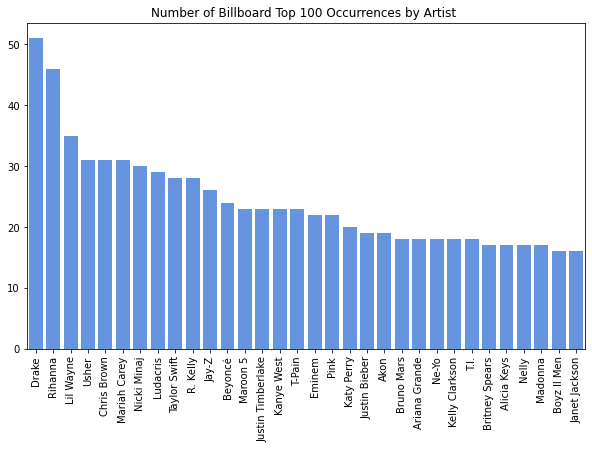

In [284]:
import seaborn as sns
quality_counts = flatframe.band_singer.value_counts()
quality_bands = quality_counts[quality_counts.values>15]
f = plt.figure(figsize = (10,6), frameon = False)
sns.barplot(quality_bands.index, quality_bands.values, color = '#528ff2')
plt.xticks(rotation=90)
plt.title("Number of Billboard Top 100 Occurrences by Artist ");

A singer should scored higher if the singer appears higher in the rankings. Number of times on the Top 100 Billboard chart would not be enough to capture the differences in rankings on that chart. To do this, we group all of a singers songs together and assign each song a score 101 - ranking

C:\Users\Ruchi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


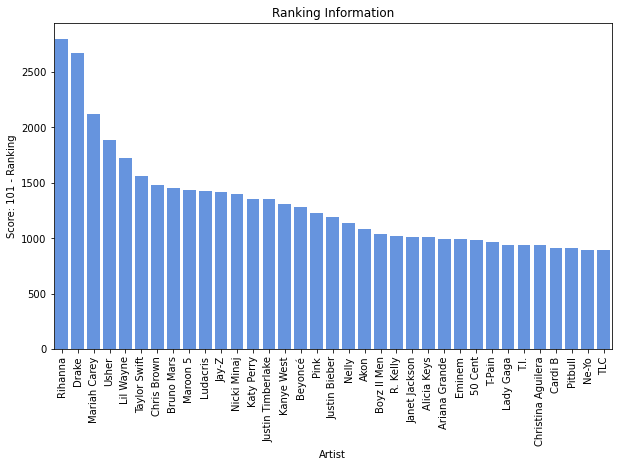

In [287]:
flatframe['quality_score'] = 101 - flatframe['ranking']
quality_ranking = flatframe.groupby('band_singer').quality_score.sum().sort_values(ascending = False)
top_35 = quality_ranking.head(35)
f = plt.figure(figsize = (10,6), frameon = False)
sns.barplot(top_35.index, top_35.values, color = '#528ff2')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Score: 101 - Ranking');
plt.title("Ranking Information");

## Q3: Scrape and Parse Wikipedia for Information about Artists and Bands 
#### [25 points]

Now, we need to fetch information about the singers or bands for all the songs in a list of years.

### 3.1 Scrape the artist's Wikipedia webpages 

Since we have hundreds of artists webpages to scrape, we have created a function which implements caching in order to speed up this process.

The cache object `urlcache` that will avoid redundant HTTP requests (e.g. an artist might have multiple singles on a single year, or be on the list over a span of years). Remember that this function is designed to be used in a loop over years, and then a loop over songs per year. Since network requests are relatively slow, if we have already requested for a singer or band's wikipedia page, caching the results is a smart thing to do.



Notice that we have wrapped the call in _an exception block_. If the request gets an HTTP code different from 200, the cells for that URL will have a value of 1; and if the request completely fails (e.g. no network connection) the cell will have a value of 2. This will allow you to analyse the failed requests.

In [222]:
urlcache={}
def get_page(url):
    if (url not in urlcache) or (urlcache[url]==1) or (urlcache[url]==2):
        time.sleep(1)
        try:
            r = requests.get("http://en.wikipedia.org%s" % url)
            if r.status_code == 200:
                urlcache[url] = r.text
            else:
                urlcache[url] = 1
        except:
            urlcache[url] = 2
    return urlcache[url]

Before we apply our function to the dataframe, let us sort `flatframe` by year. This will ensure that we will hit the cache most as singers who show up repeatedly in the rankings will have their information already pulled.

In [223]:
flatframe = flatframe.sort_values('year')
flatframe.head()

,ranking,band_singer,song,songurl,titletext,url,year,0
0,1,Boyz II Men,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),End of the Road,/wiki/Boyz_II_Men,1992,1
126,27,Atlantic Starr,Masterpiece,/wiki/Masterpiece_(Atlantic_Starr_song),Masterpiece,/wiki/Atlantic_Starr,1992,27
127,28,Celine Dion,If You Asked Me To,/wiki/If_You_Asked_Me_To,If You Asked Me To,/wiki/Celine_Dion,1992,28
128,29,En Vogue,Giving Him Something He Can Feel,/wiki/Something_He_Can_Feel,Giving Him Something He Can Feel,/wiki/En_Vogue,1992,29
129,30,Joe Public,Live and Learn,/wiki/Live_and_Learn_(Joe_Public_song),Live and Learn,/wiki/Joe_Public_(band),1992,30


In [224]:
# Here we are populating the url cache
#Note that this function will take around 20 minutes to run as we are requestinf for several pages
#This function is designed to be run again and again: it just tries to make sure that there are no unresolved pages left. 
flatframe["url"].apply(get_page)

0       <!DOCTYPE html>\n<html class="client-nojs" lan...
126     <!DOCTYPE html>\n<html class="client-nojs" lan...
127     <!DOCTYPE html>\n<html class="client-nojs" lan...
128     <!DOCTYPE html>\n<html class="client-nojs" lan...
129     <!DOCTYPE html>\n<html class="client-nojs" lan...
                              ...                        
2843    <!DOCTYPE html>\n<html class="client-nojs" lan...
2844    <!DOCTYPE html>\n<html class="client-nojs" lan...
2844    <!DOCTYPE html>\n<html class="client-nojs" lan...
2846    <!DOCTYPE html>\n<html class="client-nojs" lan...
2803    <!DOCTYPE html>\n<html class="client-nojs" lan...
Name: url, Length: 3873, dtype: object

In [225]:
#Let us make sure that there are no unresolved pages
#The sum below should be 0, and the boolean True. If that is not the case, run the above cell again until you get a sum of 0 and a boolean True
print (np.sum([(urlcache[k]==1) or (urlcache[k]==2) and isinstance(k,str) for k in urlcache]))
print (len(flatframe.url.unique())==len(urlcache))#we got all of the urls

1
True


In [226]:
#Let's save the `urlcache` and remove the old object. 
keys_values = urlcache.items()
urlcache = {str(key): str(value) for key, value in keys_values}
with open("artistinfo.json","w") as fd:
    json.dump(urlcache, fd)
del urlcache

In [228]:
with open("artistinfo.json") as json_file:
    urlcache = json.load(json_file)

### 3.2 Parse the data

Now, we need to extract the following information from each page. Write a function `singer_band_info(url, page_text)` that returns a dictionary. 

Here `url` should be the path the url corresponding to the singer's Wikipedia page (same as the previous dataframe `flatframe`), and page_text should be the HTML text for the corresponding artist's webpage. 

This function should return a dictionary which contains the following information:

1. The genres of the band or singer. These genres should be urls, to ensure their uniqueness. Create a list, `genres`, of these urls. If there are no genres, use `['NA']`.

2. If the page has the text "Born", extract the element with the class `.bday`. If there is no "Born", store `False`. Store either of these into the variable `born`. 

3. If the text "Years active" is found, but there is no birthday, assume a band. Store the years active into the variable `ya`, or `False` if the text is not found. 

The information can be found below the artists image on each such wikipedia page, as the example here shows:


![EdSheeran](https://drive.google.com/uc?export=view&id=1NJi2C-Gi5HPziuPxefNcjj5i4-04kuQ-)




The dictionary returned should be of the form:
```
{ 'url': '/wiki/Boyz_II_Men', 
'genres': ['/wiki/Contemporary_R%26B_music', '/wiki/Soul_music', '/wiki/New_jack_swing'], 
'born': None, 
'ya': '1987–present'}
```

Wikipedia has changed it's format along the years! So observing one artist's webpage and building your function based on it will probably give you tons of errors. 

Here are a few issues to remember while parsing:

1.   There are several artists that take a sabbatical between their active years (https://en.wikipedia.org/wiki/Tony!_Toni!_Ton%C3%A9!). To get the right data, write a function to calculate the longest period of time they were active and consider that as your variable `years active`. In the example give, this would be 2003–present.
2.   Birthday's are given in different formats for different pages. For example - https://en.wikipedia.org/wiki/Sir_Mix-a-Lot and https://en.wikipedia.org/wiki/Ed_Sheeran have different formats. To ensure that you get the right day, look for the 'span' tag with a 'bday' tag and ensure that there are no paranthesis around the extracted text.
3. Year's active are also given in different formats. For example - https://en.wikipedia.org/wiki/Boyz_II_Men and https://en.wikipedia.org/wiki/Ed_Sheeran are different. You could use regex ("[0-9]{4}[–][0-9]{4}" and "[0-9]{4}[–][0-9]{4}") to ensure you are getting the right years.<br> Report the edge cases found and why the Regex expression takes care of all these edge cases.

Definitely do look at your outputs as you are parsing as it can identify several edge cases you have not considered in your code.






Before parsing, it is important to note that Wikipedia has defined the same genre in a few different ways. Our parsing code will pick these up as different and new as they all differ with the alphabet case or an underscore instead of a hyphen.

We have defined a function to ensure that we have the correct representation of the number of artists in a particular genre. 

In [229]:
genres_duplicates={'/wiki/Adult_Contemporary_music':'/wiki/Adult_contemporary','/wiki/Adult_contemporary_music':'/wiki/Adult_contemporary',
'/wiki/Afrobeat':'/wiki/Afrobeats',
'/wiki/Alternative_rock':'/wiki/Alternative_Rock',
'/wiki/Avant-garde':'/wiki/Avant-garde_music',
'/wiki/Blues':'/wiki/Blues_music',
'/wiki/Comedy_hip-hop':'/wiki/Comedy_hip_hop',
'/wiki/Contemporary_R%26B':'/wiki/Contemporary_R%26B_music',
'/wiki/Contemporary_folk':'/wiki/Contemporary_folk_music',
'/wiki/Country_Folk':'/wiki/Country_folk',
'/wiki/Dance_pop':'/wiki/Dance-pop',
'/wiki/East_Coast_hip_hop':'/wiki/East_coast_hip_hop',
'/wiki/Electronic_Dance_Music':'/wiki/Electronic_dance_music',
'/wiki/Electronica':'/wiki/Electronica_music',
'/wiki/Emo':'/wiki/Emo_music',
'/wiki/Electropop':'/wiki/Electro-pop',
'/wiki/Folk-pop':'/wiki/Folk_pop',
'/wiki/Funk':'/wiki/Funk_music',
'/wiki/Grime_(music_genre)':'/wiki/Grime_music',
'/wiki/Gangsta_Rap':'/wiki/Gangsta_rap',
'/wiki/Hip_Hop_music': '/wiki/Hip_hop','/wiki/Hip_hop_music':'/wiki/Hip_hop',
'/wiki/Hyphy':'/wiki/Hyphy_music',
'/wiki/Latin_music':'/wiki/Latin_music_(genre)',
'/wiki/West_Coast_hip_hop':'/wiki/West_coast_hip_hop',
'/wiki/Southern_Hip_Hop':'/wiki/Southern_hip_hop',
'/wiki/Ska':'/wiki/Ska_music',
'/wiki/Pop-rock':'/wiki/Pop_rock',
'/wiki/Pop_Music':'/wiki/Pop_music',
'/wiki/Nu_metal':'/wiki/Nu_metal_music'}

def genre_duplicates(genres):
    for i in range(len(genres)):
        if genres[i] in genres_duplicates.keys():
            genres[i]=genres_duplicates[genres[i]]
    return genres 

Define a function to calculate the longest active years

In [30]:
def longest_Active_years(yearList):
    longest_ay=''
    longest_duration =0
    pairFound = False
    singleFound =False
    singleVal =0
    singleValDur =''
    skip= False
    nextval =''
    #print(len(yearList))
    for i in range(len(yearList)):
        temp_duration = yearList[i] 
        temp_count =0
        tupleVal = yearList[i].split('–')
        print(tupleVal)
        #print(tupleVal)
        if len(tupleVal) == 2:
            #print(tupleVal[0])
           # print(tupleVal[1])
            pairFound = True
            if tupleVal[0] == '':
                skip =True
                nextval = tupleVal[1]
                continue
            if tupleVal[1] == 'present':
                temp_count = 2021-int(tupleVal[0])
            else:
                temp_count = int(tupleVal[1]) - int(tupleVal[0])
            
            if longest_duration<temp_count:
                longest_duration = temp_count
                longest_ay = temp_duration
        elif len(tupleVal) == 1:
            if skip == True:
                tupleval1 = tupleVal[0]+'–'+nextval
                temp_count = int(nextval) - int(tupleVal[0])
                skip = False
                nextval = ''
                
                if longest_duration<temp_count:
                    longest_duration = temp_count
                    longest_ay = tupleval1
            else:
                singleFound = True
                if singleVal < int(tupleVal[0]):
                    singleVal = int(tupleVal[0])
                    singleValDur = tupleVal[0]
                    
    if pairFound == True:
        return longest_ay
    
    if singleFound == True:
        return singleValDur    
    return ''

Please write the function `singer_band_info` according to the following specification:

In [247]:
"""
Function
--------
singer_band_info

Inputs
------
url: the url
page_text: the text associated with the url
   
Returns
-------
A dictionary with the following data:
    url: copy the input argument url into this value
    genres: the genres that the band or singer works in
    born: the artist's birthday
    ya: years active variable

Notes
-----
See description above. Also note that some of the genres urls might require a 
bit of care and special handling.
"""
import re
def singer_band_info(url, page_text):
    born = False
    ya = False
    genres = False
    soup = BeautifulSoup(page_text,'html.parser') 
    table_strings = [th.string for th in soup.find_all('th')]    
    #get and clean year born data
    if "Born" in table_strings:
        try:
            year_born_td = [tr.td for tr in soup.find_all('tr') if tr.th and tr.th.string == 'Born'][0]
            for child in year_born_td.children:
                span = child.find('span')         
                if type(span) == bs4.element.Tag and span.span:
                    born = span.span.string           
                elif type(span) == bs4.element.Tag and span['class'] == ['bday']:
                    born = span.string
        except: 
            pass
    if "Genres" in table_strings:
        try:        
            genres_td = [tr.td for tr in soup.find_all('tr') if tr.th and tr.th.string == 'Genres'][0]        
            genres = []
            genres_child = ''
            genres_child_url = ''
            if genres_td.findAll('a'):
                for link in genres_td.findAll('a'):  
                    genres_child = link.text.strip()
                    genres_child_url = link.get('href').strip()
            elif genres_td.findAll('li'):
                for li in genres_td.find_all('li'):
                    for link in li.findAll('a'):  
                        genres_child = link.text.strip()
                        genres_child_url = link.get('href').strip()
            else: 
                genres_child = genres_td.text.strip()
            genres.append("Genre: " + genre_duplicates(genres_child_url))
        except: 
            pass
    if "Years active" in table_strings:
        try:
            years_active_td = [tr.td for tr in soup.find_all('tr') if tr.th and tr.th.string == 'Years active'][0]        
            if years_active_td.string:
                ya = years_active_td.string.split("–")       
            elif not years_active_td.find_all('li'):
                ya = [date for date in years_active_td.contents if type(date) == bs4.element.NavigableString]
            else:
                ya = []
                for li in years_active_td.find_all('li'):
                    for link in li.findAll('a'):  
                        ya_child = link.text.strip()
                        ya_child_url = link.get('href').strip()
                        ya.append("Year Active: " + ya_child)
        except: 
            pass
    return {"url": url, "genre" :  genres, "born": born, "ya": ya}

Let's iterate over the items in the singer-group dictionary cache `urlcache`, run the above function, and create a list.

Each element in this list is the dictionary that the function `singer_band_info` returns. 

The list should look something like this:
```
  'genres': ['/wiki/Contemporary_R%26B_music',
   '/wiki/Soul_music',
   '/wiki/New_jack_swing'],
  'url': '/wiki/Boyz_II_Men',
  'ya': '1987–present'},
 {'born': None,
  'genres': ['/wiki/Pop_music',
   '/wiki/Electronica_music',
   '/wiki/Dance_music',
   '/wiki/Rave_music',
   '/wiki/House_music'],
  'url': '/wiki/KWS_(band)',
  'ya': '1991–1994'},
 ... and so on]
  ```

In [248]:
band_singer_info_list = []
for key, value in urlcache.items():
    band_singer_info_list.append(singer_band_info(key, value))

In [249]:
band_singer_info_list

[{'url': '/wiki/Boyz_II_Men',
  'genre': ['Genre: /wiki/Soul_music'],
  'born': False,
  'ya': ['1987–present']},
 {'url': '/wiki/Atlantic_Starr',
  'genre': ['Genre: /wiki/Soul_music'],
  'born': False,
  'ya': ['1976', 'present']},
 {'url': '/wiki/Celine_Dion',
  'genre': ['Genre: /wiki/Soft_rock'],
  'born': '1968-03-30',
  'ya': False},
 {'url': '/wiki/En_Vogue',
  'genre': ['Genre: /wiki/Soul_music'],
  'born': False,
  'ya': ['1989', 'present']},
 {'url': '/wiki/Joe_Public_(band)',
  'genre': ['Genre: /wiki/Pop_music'],
  'born': False,
  'ya': ['1989', 'present']},
 {'url': '/wiki/Jodeci',
  'genre': ['Genre: /wiki/New_jack_swing'],
  'born': False,
  'ya': ['1989–present', '(hiatus 1996–2014)']},
 {'url': '/wiki/Nirvana_(band)',
  'genre': ['Genre: /wiki/Alternative_rock'],
  'born': False,
  'ya': ['1987', '1994']},
 {'url': '/wiki/Bobby_Brown',
  'genre': ['Genre: /wiki/New_jack_swing'],
  'born': '1969-02-05',
  'ya': False},
 {'url': '/wiki/Sophie_B._Hawkins',
  'genre': ['

In [250]:
#Store the list and delete the variable
with open("singer_band_info_list.json","w") as fd:
    json.dump(band_singer_info_list, fd)
del band_singer_info_list

In [251]:
#Load the list into a variable
with open("singer_band_info_list.json") as json_file:
    band_singer_info_list = json.load(json_file)

Create a dataframe from the list `singer_band_info_list`.

In [252]:
#your code here
band_singer_info_df = pd.DataFrame(band_singer_info_list)

In [253]:
band_singer_info_df.head()

,url,genre,born,ya
0,/wiki/Boyz_II_Men,[Genre: /wiki/Soul_music],False,[1987–present]
1,/wiki/Atlantic_Starr,[Genre: /wiki/Soul_music],False,"[1976, present]"
2,/wiki/Celine_Dion,[Genre: /wiki/Soft_rock],1968-03-30,False
3,/wiki/En_Vogue,[Genre: /wiki/Soul_music],False,"[1989, present]"
4,/wiki/Joe_Public_(band),[Genre: /wiki/Pop_music],False,"[1989, present]"


## Q4: Merging Artist's and Song dataframes
#### [15 points]

Now, merge the artist/song data frames into one large dataframe. Note that this has an effect of imputing to a song **all the genres** that the artist is active in. We know that this is not true, but it is the simplest assumption we can make, and is probably good for most artists. 

In [254]:
largedf = flatframe.merge(band_singer_info_df, on = 'url', how = "outer")

In [257]:
largedf.head()

,ranking,band_singer,song,songurl,titletext,url,year,0,genre,born,ya
0,1,Boyz II Men,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),End of the Road,/wiki/Boyz_II_Men,1992,1,[Genre: /wiki/Soul_music],False,[1987–present]
1,37,Boyz II Men,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,It's So Hard to Say Goodbye to Yesterday,/wiki/Boyz_II_Men,1992,37,[Genre: /wiki/Soul_music],False,[1987–present]
2,84,Boyz II Men,Uhh Ahh,/wiki/Uhh_Ahh,Uhh Ahh,/wiki/Boyz_II_Men,1992,84,[Genre: /wiki/Soul_music],False,[1987–present]
3,1,Boyz II Men,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),End of the Road,/wiki/Boyz_II_Men,1992,1,[Genre: /wiki/Soul_music],False,[1987–present]
4,37,Boyz II Men,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,It's So Hard to Say Goodbye to Yesterday,/wiki/Boyz_II_Men,1992,37,[Genre: /wiki/Soul_music],False,[1987–present]


Update the dataframe by adding a column for each genre with 1-0 encoding for each row. This means, we want columns like "/wiki/Alternative_Rock", "/wiki/Acid_jazz", where if an artist is in that genre, the dataframe cell has a 1. Otherwise, it has a 0.

Remember that an artist/band can be in multiple genres, and must have a 1 for each column corresponding to these genres, and 0 otherwise.

This will widen the dataframe by the total number of genres that we have. The expanded part will look a bit like this:

![largedfexample](https://drive.google.com/uc?export=view&id=1YgIVsyjWLXIAipI5dF2H4fvAmQodpE8L)


Ensure the data types of the dataframe is correct

In [258]:
#Convert to datatypes to required type
largedf['ranking'] = largedf['ranking'].astype('int')
largedf['year'] = largedf['year'].astype('int')
largedf['band_singer'] = largedf['band_singer'].astype('string')
largedf['song'] = largedf['song'].astype('string')
largedf['songurl'] = largedf['songurl'].astype('string')
largedf['titletext '] = largedf['titletext'].astype('string')
largedf['url'] = largedf['url'].astype('string')
largedf['genre'] = largedf['genre'].astype('string')
largedf['born'] = largedf['born'].astype('string')
largedf['ya'] = largedf['ya'].astype('string')

In [259]:
largedf.dtypes

ranking         int32
band_singer    string
song           string
songurl        string
titletext      object
url            string
year            int32
0              object
genre          string
born           string
ya             string
titletext      string
dtype: object

In [260]:
largedf = largedf[~largedf.genre.isna()]

In [261]:
largedf = largedf.sort_values('year')

In [262]:
largedf1.head()

,genre_/wiki/%2703_Bonnie_%26_Clyde,genre_/wiki/%27Til_You_Do_Me_Right,genre_/wiki/(At_Your_Best)_You_Are_Love#Aaliyah_version,genre_/wiki/(God_Must_Have_Spent)_A_Little_More_Time_on_You,genre_/wiki/(God_Must_Have_Spent)_A_Little_More_Time_on_You#Alabama_version,genre_/wiki/(When_You_Gonna)_Give_It_Up_to_Me,genre_/wiki/...Baby_One_More_Time_(song),genre_/wiki/0_to_100_/_The_Catch_Up,"genre_/wiki/1,_2,_3,_4_(Sumpin%27_New)","genre_/wiki/1,_2_Step",...,genre_/wiki/Young_Dumb_%26_Broke,genre_/wiki/Young_Forever,genre_/wiki/Youngblood_(5_Seconds_of_Summer_song),genre_/wiki/Your_Body%27s_Callin%27,genre_/wiki/Your_Body_(Pretty_Ricky_song),genre_/wiki/Your_Body_Is_a_Wonderland,genre_/wiki/Your_Love_(Nicki_Minaj_song),genre_/wiki/Your_Love_Is_My_Drug,genre_/wiki/Your_Woman,genre_/wiki/Zeze_(song)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
#Store the dataframe to use in HW-2 
largedf.to_pickle('largedf')
del largedf

In [264]:
#Loading in dataframe
largedf = pd.read_pickle('largedf')
largedf.head()

,ranking,band_singer,song,songurl,titletext,url,year,0,genre,born,ya,titletext
0,1,Boyz II Men,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),End of the Road,/wiki/Boyz_II_Men,1992,1,['Genre: /wiki/Soul_music'],False,['1987–present'],End of the Road
340,55,Genesis,I Can't Dance,/wiki/I_Can%27t_Dance,I Can't Dance,/wiki/Genesis_(band),1992,55,['Genre: #cite_note-5'],False,"['Year Active: [6]', 'Year Active: [7]', 'Year...",I Can't Dance
341,62,Genesis,Hold on My Heart,/wiki/Hold_on_My_Heart,Hold on My Heart,/wiki/Genesis_(band),1992,62,['Genre: #cite_note-5'],False,"['Year Active: [6]', 'Year Active: [7]', 'Year...",Hold on My Heart
342,68,Genesis,No Son of Mine,/wiki/No_Son_of_Mine,No Son of Mine,/wiki/Genesis_(band),1992,68,['Genre: #cite_note-5'],False,"['Year Active: [6]', 'Year Active: [7]', 'Year...",No Son of Mine
195,10,Jon Secada,Just Another Day,/wiki/Just_Another_Day_(Jon_Secada_song),Just Another Day,/wiki/Jon_Secada,1992,10,['Genre: /wiki/Latin_pop'],1961-10-04,"['1991', 'present']",Just Another Day


## Q5: Pandas and Relational databases
#### [20 points]

### 5.1 Populating the database

We use sqlite3 here. There is an even higher level API available, called SQLAlchemy.  However SQLite is built into Python and also has a command line tool and sqlite browser that you can install. 

In [265]:
import sqlite3 as sql

Let us start by creating our schema to set the type of each column in our dataframe.

In [271]:
ourschema = """
DROP TABLE IF EXISTS "BillboardHot100Singles";
CREATE TABLE "BillboardHot100Singles" (
    "id" INTEGER PRIMARY KEY  NOT NULL ,
    "ranking" INTEGER NOT NULL ,
    "band_singer" VARCHAR,
    "song" VARCHAR,
    "songurl" VARCHAR,
    "titletext" VARCHAR,
    "url" VARCHAR,
    "year" Integer,
    "0" VARCHAR,
    "genre" VARCHAR,
    "born" VARCHAR,
    "ya" VARCHAR
);
"""

Next, create a connection object which will connect us to the database and will let us execute the SQL statements. 
Create an object of the cursor using the connection object and execute our schema. 
Finally, use the `to_sql` function and convert our large expanded dataframe from the last section to a table.

In [272]:
from sqlite3 import dbapi2 as sq3
from pathlib import Path
PATHSTART="."
def get_db(dbfile):
    sqlite_db = sq3.connect(Path(PATHSTART) / dbfile)
    return sqlite_db

In [273]:
def init_db(dbfile, schema):
    db = get_db(dbfile) 
    db.cursor().executescript(schema)
    db.commit()
    return db

In [274]:
db=init_db("hotsingles.db", ourschema)

In [275]:
#Converts into a SQL Database
largedf.to_sql("BillboardHot100Singles", db, if_exists="append", index=False)

### 5.2 Performing operations on the database

In [276]:
#Defining a function to make a query
def make_query(sel):
    c=db.cursor().execute(sel)
    return c.fetchall()

In [277]:
from collections import OrderedDict
def make_frame(list_of_tuples, legend):
    framelist=[]
    for i, cname in enumerate(legend):
        framelist.append((cname,[e[i] for e in list_of_tuples]))
    return pd.DataFrame.from_dict(OrderedDict(framelist)) 

In [278]:
#Checking the columns of BillboardHot100Singles table
cols = [e[1] for e in make_query("PRAGMA table_info(BillboardHot100Singles);")]
cols

['ranking',
 'band_singer',
 'song',
 'songurl',
 'titletext',
 'url',
 'year',
 '0',
 'genre',
 'born',
 'ya',
 'titletext ']

In [279]:
out=make_query("SELECT * FROM BillboardHot100Singles;")
#Create a dataframe
make_frame(out, legend=cols)

,ranking,band_singer,song,songurl,titletext,url,year,0,genre,born,ya,titletext
0,1,Boyz II Men,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),End of the Road,/wiki/Boyz_II_Men,1992,1,['Genre: /wiki/Soul_music'],False,['1987–present'],End of the Road
1,55,Genesis,I Can't Dance,/wiki/I_Can%27t_Dance,I Can't Dance,/wiki/Genesis_(band),1992,55,['Genre: #cite_note-5'],False,"['Year Active: [6]', 'Year Active: [7]', 'Year...",I Can't Dance
2,62,Genesis,Hold on My Heart,/wiki/Hold_on_My_Heart,Hold on My Heart,/wiki/Genesis_(band),1992,62,['Genre: #cite_note-5'],False,"['Year Active: [6]', 'Year Active: [7]', 'Year...",Hold on My Heart
3,68,Genesis,No Son of Mine,/wiki/No_Son_of_Mine,No Son of Mine,/wiki/Genesis_(band),1992,68,['Genre: #cite_note-5'],False,"['Year Active: [6]', 'Year Active: [7]', 'Year...",No Son of Mine
4,10,Jon Secada,Just Another Day,/wiki/Just_Another_Day_(Jon_Secada_song),Just Another Day,/wiki/Jon_Secada,1992,10,['Genre: /wiki/Latin_pop'],1961-10-04,"['1991', 'present']",Just Another Day
...,...,...,...,...,...,...,...,...,...,...,...,...
3868,51,Gucci Mane,Wake Up in the Sky,/wiki/Wake_Up_in_the_Sky,Wake Up in the Sky,/wiki/Gucci_Mane,2019,51,['Genre: /wiki/Southern_hip_hop'],1980-02-12,"['2001', 'present']",Wake Up in the Sky
3869,57,DJ Snake,Taki Taki,/wiki/Taki_Taki_(song),Taki Taki,/wiki/DJ_Snake,2019,57,['Genre: /wiki/Big_room_house'],1986-06-13,"['2009', 'present']",Taki Taki
3870,31,Kodak Black,Zeze,/wiki/Zeze_(song),Zeze,/wiki/Kodak_Black,2019,31,['Genre: /wiki/Mumble_rap'],1997-06-11,"['2009', 'present']",Zeze
3871,37,Bruno Mars,Please Me,/wiki/Please_Me,Please Me,/wiki/Bruno_Mars,2019,37,['Genre: /wiki/Rock_music'],1985-10-08,False,Please Me


Answer the following questions by writing SQL statements.

#### 5.2.1 Select all singers below the age of 20 whos Zodiac Sign is Scorpio! 

In [ ]:
out=make_query("SELECT * FROM BillboardHot100Singles where age < 20 and Zodiac_Sign = 'Scorpio'")
#Create a dataframe
make_frame(out, legend=cols)

#### 5.2.2 Find the most popular artists with most appearances in Billboard Top 10

In [280]:
cols_bs = ["band_singer", "count"]

In [281]:
#your code here
out=make_query("SELECT band_singer, count(*) as count FROM BillboardHot100Singles group by band_singer order by count desc")
#Create a dataframe
make_frame(out, legend=cols_bs)

,band_singer,count
0,Drake,51
1,Rihanna,46
2,Lil Wayne,35
3,Usher,31
4,Mariah Carey,31
...,...,...
1227,3LW,1
1228,20 Fingers,1
1229,2 Pistols,1
1230,"10,000 Maniacs",1


#### 5.2.3 Select all songs with ranking less than 6 and order the rows by artist name

In [282]:
out=make_query("SELECT * FROM BillboardHot100Singles where ranking < 6 order by band_singer")
#Create a dataframe
make_frame(out, legend=cols)

,ranking,band_singer,song,songurl,titletext,url,year,0,genre,born,ya,titletext
0,3,112,I'll Be Missing You,/wiki/I%27ll_Be_Missing_You,I'll Be Missing You,/wiki/112_(band),1997,3,['Genre: /wiki/Contemporary_R%26B'],False,['1993–present'],I'll Be Missing You
1,5,21 Savage,Rockstar,/wiki/Rockstar_(Post_Malone_song),Rockstar,/wiki/21_Savage,2018,5,['Genre: #cite_note-2'],1992-10-22,"['2013', 'present']",Rockstar
2,5,3 Doors Down,When I'm Gone,/wiki/When_I%27m_Gone_(3_Doors_Down_song),When I'm Gone,/wiki/3_Doors_Down,2003,5,['Genre: #cite_note-usatoday-3'],False,"['1996', 'present']",When I'm Gone
3,1,50 Cent,In da Club,/wiki/In_da_Club,In da Club,/wiki/50_Cent,2003,1,['Genre: /wiki/Hip_hop_music'],1975-07-06,False,In da Club
4,1,Ace of Base,The Sign,/wiki/The_Sign_(song),The Sign,/wiki/Ace_of_Base,1994,1,['Genre: #cite_note-Europop-5'],False,"['1990', 'present']",The Sign
...,...,...,...,...,...,...,...,...,...,...,...,...
198,3,Wizkid,One Dance,/wiki/One_Dance,One Dance,/wiki/Wizkid_(musician),2016,3,['Genre: #cite_note-RCA_Records_Bio-1'],1990-07-16,['2001–present'],One Dance
199,5,Wyclef Jean,Hips Don't Lie,/wiki/Hips_Don%27t_Lie,Hips Don't Lie,/wiki/Wyclef_Jean,2006,5,['Genre: /wiki/Neo_soul'],1969-10-17,False,Hips Don't Lie
200,4,Young Thug,Havana,/wiki/Havana_(Camila_Cabello_song),Havana,/wiki/Young_Thug,2018,4,['Genre: /wiki/Pop_rap'],1991-08-16,['2010–present'],Havana
201,5,Yung Joc,Buy U a Drank (Shawty Snappin'),/wiki/Buy_U_a_Drank_(Shawty_Snappin%27),Buy U a Drank (Shawty Snappin'),/wiki/Yung_Joc,2007,5,['Genre: /wiki/Hip_hop_music'],1980-09-20,"['2003', 'present']",Buy U a Drank (Shawty Snappin')
